In [2]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Conv2D, Flatten, Dense,Dropout
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from PIL import Image
import numpy as np
import glob
import matplotlib.pyplot as plt
import time
import os

Using TensorFlow backend.


In [3]:
folder = os.listdir("data")
image_size = 256
dense_size  = len(folder)

X = []
Y = []
for index, name in enumerate(folder):
    dir = "./data/" + name
    files = glob.glob(dir + "/*.jpg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        X.append(data)
        Y.append(index)
        
X = np.array(X)
Y = np.array(Y)
X = X.astype('float32')
X = X / 255.0

Y = np_utils.to_categorical(Y, dense_size)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

C:\Users\masa5\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(dense_size))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 254, 254, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 127, 127, 64)     

In [ ]:
optimizers ="Adadelta"
results = {}
epochs = 50
model.compile(loss='categorical_crossentropy', optimizer=optimizers, metrics=['accuracy'])
results= model.fit(X_train, y_train, validation_split=0.2, epochs=epochs )

model_json_str = model.to_json()
open('mnist_mlp_model.json', 'w').write(model_json_str)
model.save_weights('mnist_mlp_weights.h5');

Train on 1039 samples, validate on 260 samples
Epoch 1/50


In [25]:
X_train[0]

array([[[0.9098039 , 0.8784314 , 0.827451  ],
        [0.91764706, 0.8901961 , 0.827451  ],
        [0.92156863, 0.8980392 , 0.84313726],
        ...,
        [0.84705883, 0.7921569 , 0.7411765 ],
        [0.83137256, 0.7764706 , 0.7254902 ],
        [0.8156863 , 0.76862746, 0.7058824 ]],

       [[0.92156863, 0.88235295, 0.8352941 ],
        [0.91764706, 0.8862745 , 0.8352941 ],
        [0.92941177, 0.89411765, 0.8352941 ],
        ...,
        [0.8392157 , 0.7921569 , 0.7294118 ],
        [0.83137256, 0.78431374, 0.72156864],
        [0.81960785, 0.77254903, 0.70980394]],

       [[0.92156863, 0.88235295, 0.8352941 ],
        [0.92156863, 0.8901961 , 0.8392157 ],
        [0.9254902 , 0.8862745 , 0.8392157 ],
        ...,
        [0.84313726, 0.79607844, 0.7490196 ],
        [0.83137256, 0.78431374, 0.72156864],
        [0.8156863 , 0.78039217, 0.72156864]],

       ...,

       [[0.87058824, 0.81960785, 0.7882353 ],
        [0.87058824, 0.827451  , 0.8039216 ],
        [0.87058824, 0

In [26]:
print(Y)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


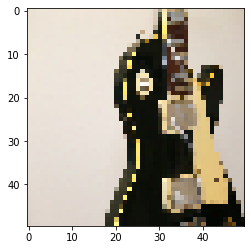

In [31]:
plt.imshow(X_train[0])

In [35]:
model.predict(X_test[0:2])

array([[4.4822679e-30, 9.9999952e-01, 5.0607952e-07, 4.2753867e-19],
       [8.2474777e-08, 9.7017890e-01, 4.8205737e-09, 2.9820966e-02]],
      dtype=float32)

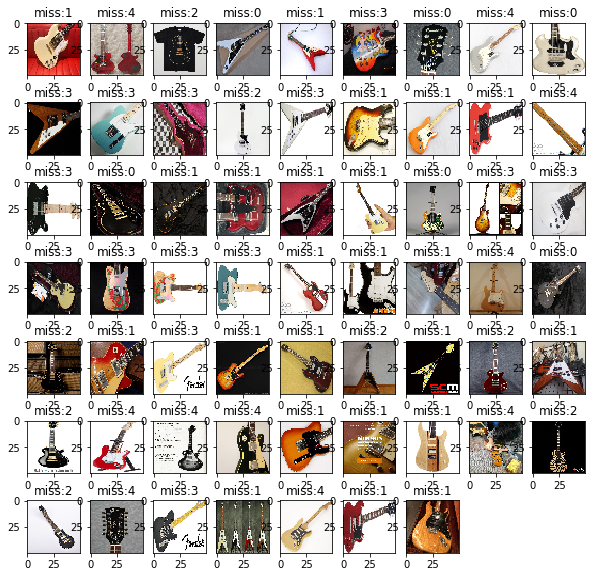

In [117]:
a = model.predict(X_test[0:])
b = y_test - a
count = 0
plt.figure(figsize=(10,10))
for i, b_i, a_i in zip(X_test,b,a):
    if (abs(b_i)>0.25).sum()>=1:
        count = count + 1
        plt.subplot(7,9,count)
        plt.imshow(i)
        plt.title("miss:"+str(np.argmax(a_i)))
    else:
        pass
print(count)

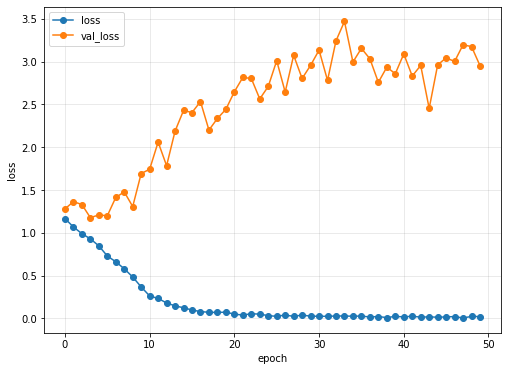

In [121]:
plt.figure(figsize = (18,6))

plt.subplot(1, 2, 2)
plt.plot(results.history["loss"], label = "loss", marker = "o")
plt.plot(results.history["val_loss"], label = "val_loss", marker = "o")
#plt.xticks(np.arange())
#plt.yticks(np.arange())
plt.xlabel("epoch")
plt.ylabel("loss")
#plt.title("")
plt.legend(loc = "best")
plt.grid(color = 'gray', alpha = 0.2)

plt.show()


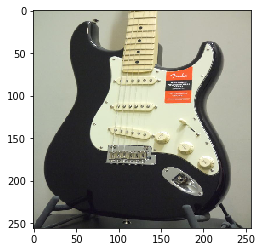

In [123]:
plt.imshow(X_train[0])